In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [134]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
data = pd.read_csv(url)

In [135]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [136]:
columns_of_interest = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [137]:
data = data[columns_of_interest]

In [138]:
# Lowercase the column names and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [139]:
# Fill missing values with 0
data.fillna(0, inplace=True)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [140]:
# Create the binary target variable 'above_average'
average_msrp = data['msrp'].mean()
data['above_average'] = (data['msrp'] > average_msrp).astype(int)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [142]:
# Print the shapes of the resulting datasets
print("Train data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (7148, 11)
Validation data shape: (2383, 11)
Test data shape: (2383, 11)


In [143]:
# Print the shapes of the resulting datasets
print("Train data shape:", df_train.shape)
print("Validation data shape:", df_val.shape)
print("Test data shape:", df_test.shape)

Train data shape: (7148, 11)
Validation data shape: (2383, 11)
Test data shape: (2383, 11)


In [144]:
from sklearn.metrics import roc_auc_score
import pandas as pd

In [145]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
5727,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
5814,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
8450,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
2396,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
5494,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0
...,...,...,...,...,...,...,...,...,...,...,...
5864,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,20995,0
7924,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,35850,0
4719,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,20265,0
63,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,2000,0


In [146]:
# Calculate ROC AUC for engine_hp
auc_engine_hp = roc_auc_score(df_train['above_average'], df_train['engine_hp'])

# Calculate ROC AUC for engine_cylinders
auc_engine_cylinders = roc_auc_score(df_train['above_average'], df_train['engine_cylinders'])

# Calculate ROC AUC for highway_mpg
auc_highway_mpg = roc_auc_score(df_train['above_average'], df_train['highway_mpg'])

# Calculate ROC AUC for city_mpg
auc_city_mpg = roc_auc_score(df_train['above_average'], df_train['city_mpg'])

In [147]:
# Invert variables if AUC < 0.5
if auc_engine_hp < 0.5:
    auc_engine_hp = -auc_engine_hp

if auc_engine_cylinders < 0.5:
    auc_engine_cylinders = -auc_engine_cylinders

if auc_highway_mpg < 0.5:
    auc_highway_mpg = -auc_highway_mpg

if auc_city_mpg < 0.5:
    auc_city_mpg = -auc_city_mpg


In [148]:
auc_engine_hp

0.9171031265539011

In [149]:
auc_engine_cylinders

0.766116490165669

In [150]:
auc_highway_mpg

-0.3669412128227987

In [151]:
auc_city_mpg

-0.3265755356754767

In [152]:
-auc_city_mpg

0.3265755356754767

QUESTION 11 = 4

Q.2

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [154]:
# Perform one-hot encoding using DictVectorizer
dict_vectorizer = DictVectorizer(sparse=False)

In [155]:
features = [
    'make', 'model', 'year', 'engine_hp', 'engine_cylinders',
    'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'
]
target = 'above_average'

In [156]:
X_train = dict_vectorizer.fit_transform(df_train[features].to_dict(orient='records'))
X_validation = dict_vectorizer.transform(df_val[features].to_dict(orient='records'))

In [166]:
# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, df_train[target])

LogisticRegression(max_iter=1000, solver='liblinear')

In [167]:
# Predict probabilities on the validation set
validation_pred_probs = model.predict_proba(X_validation)[:, 1]

In [168]:
# Calculate the AUC on the validation dataset
auc = roc_auc_score(validation_data[target], validation_pred_probs)

In [169]:
# Round the AUC to 3 digits
rounded_auc = round(auc, 3)

In [170]:
# Print the rounded AUC
print("AUC on the validation dataset:", rounded_auc)

AUC on the validation dataset: 0.506


QUESTION 2 = 1?!

Q.3

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [172]:
thresholds = np.arange(0.0, 1.01, 0.01)
precision_scores = []
recall_scores = []

In [173]:
for threshold in thresholds:
    # Apply the threshold to the predicted probabilities
    predicted_labels = (validation_pred_probs >= threshold).astype(int)
    
    # Compute precision and recall for the current threshold
    precision = precision_score(validation_data[target], predicted_labels)
    recall = recall_score(validation_data[target], predicted_labels)
    
    # Append precision and recall values to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)


C:\Users\AHAD\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


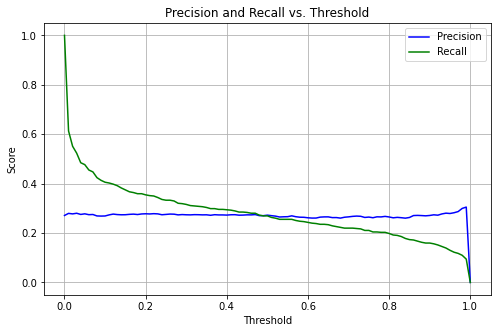

In [174]:
# Plot precision and recall curves
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)

In [176]:
# Find the threshold where precision and recall curves intersect
intersection_threshold = thresholds[np.argwhere(np.isclose(precision_scores, recall_scores, atol=0.01))[0][0]]

In [177]:
# Display the threshold
print("Threshold where precision and recall curves intersect:", intersection_threshold)
plt.show()

Threshold where precision and recall curves intersect: 0.45


QUESTION 3 = 2?!

Q.4

In [184]:
# Iterate through different thresholds
for threshold in thresholds:
    # Apply the threshold to the predicted probabilities
    predicted_labels = (validation_pred_probs >= threshold).astype(int)
    
    # Compute the F1 score for the current threshold
    f1 = f1_score(validation_data[target], predicted_labels)
    
    # Append the F1 score to the list
    f1_scores.append(f1)

In [185]:
# Find the threshold where F1 is maximal
max_f1_threshold = thresholds[np.argmax(f1_scores)]

# Display the threshold at which F1 is maximal
print("Threshold where F1 is maximal:", max_f1_threshold)

# Find the threshold where F1 is maximal
max_f1_threshold = thresholds[np.argmax(f1_scores)]

# Display the threshold at which F1 is maximal
print("Threshold where F1 is maximal:", max_f1_threshold)

Threshold where F1 is maximal: 0.0
Threshold where F1 is maximal: 0.0


QUESTION 4 = ?!

Q.5

In [187]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the number of folds and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize an empty list to store the AUC scores for each fold
auc_scores = []

In [188]:
for train_index, val_index in kf.split(train_data):
    # Split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = train_data[target].values[train_index], train_data[target].values[val_index]

    # Initialize and train the logistic regression model with the specified parameters
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)

    # Predict probabilities on the validation set
    val_pred_probs = model.predict_proba(X_val_fold)[:, 1]

    # Calculate the AUC score for this fold
    auc = roc_auc_score(y_val_fold, val_pred_probs)

    # Append the AUC score to the list
    auc_scores.append(auc)


In [189]:
# Calculate the standard deviation of the AUC scores across different folds
std_deviation = np.std(auc_scores)

# Display the standard deviation
print("Standard deviation of the scores across different folds:", std_deviation)

Standard deviation of the scores across different folds: 0.010807064670641603


QUESTION 5 = CLOSEST ANSWER IS 2

Q.6

In [191]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [192]:
# Define the values of C to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize an empty list to store mean scores and standard deviations for each C
mean_scores = []
std_devs = []


In [194]:
# Iterate over different C values
for C in C_values:
    # Initialize KFold with the same parameters as before
    kf = KFold(n_splits=5, shuffle=True, random_state=1)

    # Initialize an empty list to store AUC scores for each fold
    auc_scores = []

    # Iterate over different folds
    for train_index, val_index in kf.split(train_data):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = train_data[target].values[train_index], train_data[target].values[val_index]

        # Initialize and train the logistic regression model with the current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_fold, y_train_fold)

        # Predict probabilities on the validation set
        val_pred_probs = model.predict_proba(X_val_fold)[:, 1]

        # Calculate the AUC score for this fold
        auc = roc_auc_score(y_val_fold, val_pred_probs)

        # Append the AUC score to the list
        auc_scores.append(auc)
        
         # Calculate the mean and standard deviation of AUC scores for this C value
    mean_score = np.mean(auc_scores)
    std_dev = np.std(auc_scores)

    # Append the mean score and standard deviation to the respective lists
    mean_scores.append(round(mean_score, 3))
    std_devs.append(round(std_dev, 3))


In [195]:
# Find the index of the C value with the best mean score (and lowest std if tied)
best_c_index = np.argmax(mean_scores)

# Get the best C value based on the index
best_c = C_values[best_c_index]

# Display the results
print("C values:", C_values)
print("Mean scores:", mean_scores)
print("Standard deviations:", std_devs)
print("Best C:", best_c)

C values: [0.01, 0.1, 0.5, 10]
Mean scores: [0.516, 0.513, 0.513, 0.511]
Standard deviations: [0.008, 0.009, 0.015, 0.011]
Best C: 0.01


QUESTION 6 = ANSWER IS 1
